In [1]:
!python --version

Python 3.10.14


In [2]:
import gc
gc.collect()

3

In [3]:
in_colab = False

In [4]:
if in_colab:

  from google.colab import drive
  drive.mount("/content/drive/", force_remount = True)

In [5]:
if in_colab:
  !pip install torch_geometric

In [6]:
import torch_geometric
print(torch_geometric.typing.WITH_PYG_LIB)

True


In [7]:
if in_colab:
  %cd "/content/drive/MyDrive/TAB-2024-2025/Explainability"

In [8]:
!dir

 Il volume nell'unit… C non ha etichetta.
 Numero di serie del volume: DC77-C4A7

 Directory di C:\Users\Utente\Desktop\ADIN

02/01/2025  19:03    <DIR>          .
02/01/2025  13:09    <DIR>          ..
27/12/2024  22:58    <DIR>          .ipynb_checkpoints
02/01/2025  19:03    <DIR>          .virtual_documents
02/01/2025  19:03    <DIR>          .vs
02/01/2025  18:07    <DIR>          adin
29/09/2024  14:45    <DIR>          assets
27/12/2024  23:07            38.124 feature_importance.png
16/10/2024  14:20        10.037.628 gaan.pt
13/11/2024  13:57           112.578 gnn.ipynb
27/12/2024  23:18         1.268.037 GNN_Explainer.ipynb
19/11/2024  19:57           503.396 god.ipynb
21/11/2024  12:06            99.896 god_isn.ipynb
19/11/2024  22:04           355.782 graph_temporal_trajectories.ipynb
27/12/2024  23:18           948.727 Integrated_Gradients.png
26/09/2024  14:50             1.088 LICENSE
02/01/2025  17:47           106.826 main.py
24/09/2024  20:03         1.636.551 ML_GEO.

In [9]:
import os
cwd = os.getcwd()
sep = os.sep
datapath = cwd + sep + "Dataset" + sep
datapath

'C:\\Users\\Utente\\Desktop\\ADIN\\Dataset\\'

In [10]:
expr_filename = cwd + sep + "use_case" + sep + "data"+ sep+ "bladder_cancer" + sep + "gene_expression_data_preprocessed.csv"

In [11]:
import pandas as pd

expr = pd.read_csv(expr_filename, index_col = 0)
expr

,ATP2A1,SLMAP,MEOX2,HOXD3,ZNF398,PANX1,COX8C,IMPA2,TTC8,FLJ35816,...,ZFP2.1,CST9L.1,C11orf24.1,QPRT.1,LEPRE1.1,GNAS.29,RPN1.1,CYB5A.1,AP1S1.1,Target
GSM928410,0.663336,0.529598,0.162563,0.383908,0.096852,0.137029,0.971139,0.039016,0.029115,0.530092,...,0.174781,0.759511,0.103661,0.200964,0.200289,0.397994,0.031667,0.116547,0.061299,0
GSM928411,0.732851,0.637804,0.087245,0.364565,0.100989,0.104867,0.968545,0.046063,0.035143,0.592064,...,0.094503,0.747333,0.085542,0.224168,0.103062,0.376746,0.028174,0.069490,0.101310,0
GSM928412,0.731909,0.467229,0.151392,0.410514,0.105380,0.118404,0.961028,0.043965,0.031300,0.554694,...,0.110763,0.764336,0.102852,0.236077,0.155706,0.383049,0.019629,0.077901,0.089061,0
GSM928413,0.756482,0.712974,0.125020,0.438931,0.072189,0.117990,0.971448,0.044214,0.031502,0.587456,...,0.052426,0.775798,0.109610,0.217205,0.176550,0.412991,0.034196,0.062415,0.061597,0
GSM928414,0.627336,0.374188,0.072009,0.564686,0.083819,0.094375,0.968190,0.028884,0.018645,0.596519,...,0.043576,0.792672,0.094405,0.219325,0.125886,0.396564,0.021866,0.046562,0.043234,0
GSM928415,0.668793,0.394460,0.122008,0.392940,0.084649,0.105771,0.973028,0.041213,0.023148,0.579087,...,0.113668,0.757963,0.079168,0.245785,0.117861,0.300823,0.027338,0.049083,0.084346,0
GSM928416,0.426092,0.256789,0.158605,0.744571,0.093180,0.117594,0.971882,0.050376,0.049978,0.508073,...,0.052173,0.777005,0.084534,0.231139,0.226753,0.396463,0.028637,0.082773,0.045241,1
GSM928417,0.543068,0.161934,0.095487,0.781442,0.045247,0.119621,0.964217,0.040574,0.030213,0.378127,...,0.051021,0.745892,0.098363,0.204016,0.191636,0.173303,0.014033,0.053147,0.035183,1
GSM928418,0.806099,0.783551,0.182352,0.764526,0.086602,0.122421,0.963932,0.043778,0.030160,0.501038,...,0.060801,0.801456,0.091301,0.217928,0.198903,0.358943,0.028659,0.058941,0.042113,1
GSM928419,0.535368,0.125626,0.101444,0.811086,0.027037,0.069629,0.970158,0.032499,0.022672,0.557364,...,0.042587,0.790621,0.065476,0.230631,0.131507,0.407219,0.016708,0.056320,0.027419,1


In [12]:
clinic = pd.DataFrame(expr["Target"])
clinic

,Target
GSM928410,0
GSM928411,0
GSM928412,0
GSM928413,0
GSM928414,0
GSM928415,0
GSM928416,1
GSM928417,1
GSM928418,1
GSM928419,1


In [13]:
expr = expr.drop("Target", axis = 1)
expr

,ATP2A1,SLMAP,MEOX2,HOXD3,ZNF398,PANX1,COX8C,IMPA2,TTC8,FLJ35816,...,A2ML1.1,ZFP2.1,CST9L.1,C11orf24.1,QPRT.1,LEPRE1.1,GNAS.29,RPN1.1,CYB5A.1,AP1S1.1
GSM928410,0.663336,0.529598,0.162563,0.383908,0.096852,0.137029,0.971139,0.039016,0.029115,0.530092,...,0.626678,0.174781,0.759511,0.103661,0.200964,0.200289,0.397994,0.031667,0.116547,0.061299
GSM928411,0.732851,0.637804,0.087245,0.364565,0.100989,0.104867,0.968545,0.046063,0.035143,0.592064,...,0.671998,0.094503,0.747333,0.085542,0.224168,0.103062,0.376746,0.028174,0.069490,0.101310
GSM928412,0.731909,0.467229,0.151392,0.410514,0.105380,0.118404,0.961028,0.043965,0.031300,0.554694,...,0.602572,0.110763,0.764336,0.102852,0.236077,0.155706,0.383049,0.019629,0.077901,0.089061
GSM928413,0.756482,0.712974,0.125020,0.438931,0.072189,0.117990,0.971448,0.044214,0.031502,0.587456,...,0.627324,0.052426,0.775798,0.109610,0.217205,0.176550,0.412991,0.034196,0.062415,0.061597
GSM928414,0.627336,0.374188,0.072009,0.564686,0.083819,0.094375,0.968190,0.028884,0.018645,0.596519,...,0.710886,0.043576,0.792672,0.094405,0.219325,0.125886,0.396564,0.021866,0.046562,0.043234
GSM928415,0.668793,0.394460,0.122008,0.392940,0.084649,0.105771,0.973028,0.041213,0.023148,0.579087,...,0.658017,0.113668,0.757963,0.079168,0.245785,0.117861,0.300823,0.027338,0.049083,0.084346
GSM928416,0.426092,0.256789,0.158605,0.744571,0.093180,0.117594,0.971882,0.050376,0.049978,0.508073,...,0.221204,0.052173,0.777005,0.084534,0.231139,0.226753,0.396463,0.028637,0.082773,0.045241
GSM928417,0.543068,0.161934,0.095487,0.781442,0.045247,0.119621,0.964217,0.040574,0.030213,0.378127,...,0.268238,0.051021,0.745892,0.098363,0.204016,0.191636,0.173303,0.014033,0.053147,0.035183
GSM928418,0.806099,0.783551,0.182352,0.764526,0.086602,0.122421,0.963932,0.043778,0.030160,0.501038,...,0.265713,0.060801,0.801456,0.091301,0.217928,0.198903,0.358943,0.028659,0.058941,0.042113
GSM928419,0.535368,0.125626,0.101444,0.811086,0.027037,0.069629,0.970158,0.032499,0.022672,0.557364,...,0.141304,0.042587,0.790621,0.065476,0.230631,0.131507,0.407219,0.016708,0.056320,0.027419


In [14]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [15]:
import torch
import numpy as np

def parse_edges(edge_list):
    source_nodes = []
    target_nodes = []
    node_mapping = {}
    next_index = 0

    for edge in edge_list:
        source, target = edge.split('_')
        #if source == target:
        #    continue
        if source not in node_mapping:
            node_mapping[source] = next_index
            next_index += 1
        if target not in node_mapping:
            node_mapping[target] = next_index
            next_index += 1

        source_nodes.append(node_mapping[source])
        target_nodes.append(node_mapping[target])

    return source_nodes, target_nodes, node_mapping

def create_edge_index(source_nodes, target_nodes):
    edge_list = np.array([source_nodes, target_nodes], dtype=np.int64)
    edge_index = torch.LongTensor(edge_list)
    return edge_index

In [16]:
exp_values = torch.tensor(expr.values).to(device)
corr = torch.corrcoef(exp_values)
corr.shape

torch.Size([24, 24])

In [17]:
from torch.nn.functional import cosine_similarity

In [18]:
n = len(exp_values)
sim_matrix = np.zeros((n, n))
for i, elem1 in enumerate(exp_values):
  for j, elem2 in enumerate(exp_values):
    sim = cosine_similarity(elem1, elem2, dim = 0).item()
    sim_matrix[i][j] = sim

In [19]:
sim_matrix

array([[1.        , 0.98716688, 0.9877132 , 0.9790296 , 0.97098654,
        0.98624697, 0.90942817, 0.89622349, 0.9241625 , 0.92965189,
        0.86237835, 0.89938386, 0.91207667, 0.93741412, 0.93798899,
        0.92412267, 0.8871658 , 0.91755491, 0.90285488, 0.90231683,
        0.88125474, 0.90061897, 0.89006381, 0.83132263],
       [0.98716688, 1.        , 0.99625498, 0.98652225, 0.98212716,
        0.99610172, 0.91349558, 0.90190234, 0.92922251, 0.9403113 ,
        0.8675916 , 0.90792097, 0.92240851, 0.9481358 , 0.93175163,
        0.938474  , 0.89920756, 0.93238335, 0.91471117, 0.91473418,
        0.88862206, 0.91007374, 0.89885913, 0.82738304],
       [0.9877132 , 0.99625498, 1.        , 0.98507766, 0.9811248 ,
        0.99578379, 0.9149563 , 0.90209161, 0.92978193, 0.94154521,
        0.86732477, 0.90820676, 0.92195579, 0.94819425, 0.93196911,
        0.93889082, 0.89862307, 0.93172695, 0.91363926, 0.91488155,
        0.88806434, 0.90955826, 0.89935643, 0.82630883],
       [0.979

In [20]:
edges_1 = []
edge_list = []
edge_weights = []

#th = 0.999
th = 0.80
for i, elem1 in enumerate(exp_values):
  for j, elem2 in enumerate(exp_values):
    #sim = sim_matrix[i][i]
    sim = corr[i, j]
    if sim > th:
      if f"{expr.T.columns[i]}_{expr.T.columns[j]}" not in edges_1 and f"{expr.T.columns[j]}_{expr.T.columns[i]}" not in edges_1:
        edges_1.append(f"{expr.T.columns[i]}_{expr.T.columns[j]}")
        edge_list.append((expr.T.columns[i], expr.T.columns[j]))
        edge_weights.append(sim)


In [21]:
len(edges_1)

253

In [22]:
# Parse the edges and create node mapping
source_nodes, target_nodes, node_mapping = parse_edges(edges_1)

# Print node mapping for reference
print("Node Mapping:", node_mapping)

# Create edge_index tensor
edge_index = create_edge_index(source_nodes, target_nodes)

print("Edge Index Tensor:")
print(edge_index)

Node Mapping: {'GSM928410': 0, 'GSM928411': 1, 'GSM928412': 2, 'GSM928413': 3, 'GSM928414': 4, 'GSM928415': 5, 'GSM928416': 6, 'GSM928418': 7, 'GSM928419': 8, 'GSM928421': 9, 'GSM928422': 10, 'GSM928423': 11, 'GSM928424': 12, 'GSM928425': 13, 'GSM928426': 14, 'GSM928427': 15, 'GSM928428': 16, 'GSM928429': 17, 'GSM928431': 18, 'GSM928432': 19, 'GSM928417': 20, 'GSM928420': 21, 'GSM928430': 22, 'GSM928433': 23}
Edge Index Tensor:
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
          3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
          5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
          6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 20, 20, 20, 20, 20,
 

In [23]:
edgelist = [(edge.split("_")[0], edge.split("_")[1]) for edge in edges_1 if edge.split("_")[0] != edge.split("_")[1]]
edgelist

[('GSM928410', 'GSM928411'),
 ('GSM928410', 'GSM928412'),
 ('GSM928410', 'GSM928413'),
 ('GSM928410', 'GSM928414'),
 ('GSM928410', 'GSM928415'),
 ('GSM928410', 'GSM928416'),
 ('GSM928410', 'GSM928418'),
 ('GSM928410', 'GSM928419'),
 ('GSM928410', 'GSM928421'),
 ('GSM928410', 'GSM928422'),
 ('GSM928410', 'GSM928423'),
 ('GSM928410', 'GSM928424'),
 ('GSM928410', 'GSM928425'),
 ('GSM928410', 'GSM928426'),
 ('GSM928410', 'GSM928427'),
 ('GSM928410', 'GSM928428'),
 ('GSM928410', 'GSM928429'),
 ('GSM928410', 'GSM928431'),
 ('GSM928410', 'GSM928432'),
 ('GSM928411', 'GSM928412'),
 ('GSM928411', 'GSM928413'),
 ('GSM928411', 'GSM928414'),
 ('GSM928411', 'GSM928415'),
 ('GSM928411', 'GSM928416'),
 ('GSM928411', 'GSM928417'),
 ('GSM928411', 'GSM928418'),
 ('GSM928411', 'GSM928419'),
 ('GSM928411', 'GSM928421'),
 ('GSM928411', 'GSM928422'),
 ('GSM928411', 'GSM928423'),
 ('GSM928411', 'GSM928424'),
 ('GSM928411', 'GSM928425'),
 ('GSM928411', 'GSM928426'),
 ('GSM928411', 'GSM928427'),
 ('GSM928411',

In [24]:
import networkx as nx

G = nx.from_edgelist(edgelist)

In [25]:
len(G.nodes), len(clinic["Target"].values)

(24, 24)

In [26]:
y = clinic["Target"].values

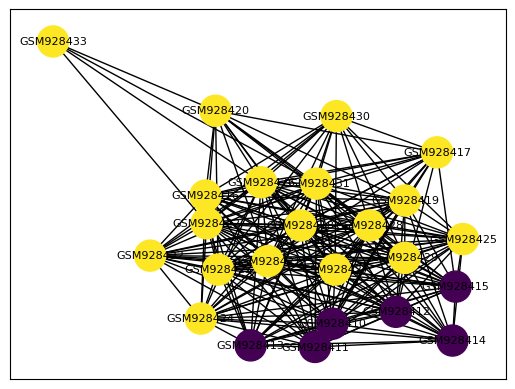

In [27]:
nx.draw_networkx(G, with_labels=True, node_color=y, node_size=500, font_size=8)

In [28]:
expr.values.shape

(24, 27551)

In [29]:
edge_weights = torch.tensor(edge_weights)
edge_weights

tensor([1.0000, 0.9747, 0.9752, 0.9596, 0.9494, 0.9742, 0.8160, 0.8444, 0.8819,
        0.8200, 0.8528, 0.8893, 0.9070, 0.8823, 0.8273, 0.8767, 0.8445, 0.8476,
        0.8364, 0.8053, 1.0000, 0.9925, 0.9737, 0.9682, 0.9925, 0.8287, 0.8130,
        0.8587, 0.8987, 0.8358, 0.8692, 0.9077, 0.8908, 0.9036, 0.8444, 0.8979,
        0.8623, 0.8657, 0.8509, 0.8215, 1.0000, 0.9709, 0.9668, 0.9921, 0.8305,
        0.8126, 0.8588, 0.9016, 0.8363, 0.8688, 0.9081, 0.8920, 0.9053, 0.8442,
        0.8978, 0.8611, 0.8668, 0.8505, 0.8224, 1.0000, 0.9539, 0.9694, 0.8051,
        0.8365, 0.8653, 0.8036, 0.8447, 0.8826, 0.8621, 0.8668, 0.8184, 0.8649,
        0.8415, 0.8376, 0.8361, 1.0000, 0.9673, 0.8135, 0.8645, 0.8243, 0.8701,
        0.8576, 0.8647, 0.8084, 0.8609, 0.8185, 0.8264, 0.8111, 1.0000, 0.8274,
        0.8101, 0.8574, 0.8954, 0.8335, 0.8676, 0.9055, 0.8881, 0.9008, 0.8426,
        0.8941, 0.8592, 0.8629, 0.8498, 0.8227, 1.0000, 0.8271, 0.8910, 0.8659,
        0.8306, 0.8759, 0.8976, 0.8879, 

In [30]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_expr(expr, ys, method="PCA"):

  labels = {0: "Normal", 1: "NMIBC"}

  #colors = ListedColormap(['r','b','g'])

  methods = ["PCA", "t-SNE"]
  if method not in methods:
    raise Exception(f"Invalid method. Must be one of {methods}")
  else:
    plt.figure()
    if method == "PCA":

      pca = PCA(n_components=2)
      expr = pca.fit_transform(expr)

    else:

      tsne = TSNE(n_components=2, perplexity = 2)
      expr = tsne.fit_transform(expr)

  unique_ys = np.unique(ys)
  color = ["purple", "orange"]
  for y in unique_ys:
    print(y)
    mask = ys == y
    plt.scatter(expr[mask, 0], expr[mask, 1], c = color[y], label=labels[y])

  plt.title("Expr - {}".format(method))
  plt.legend()

0
1


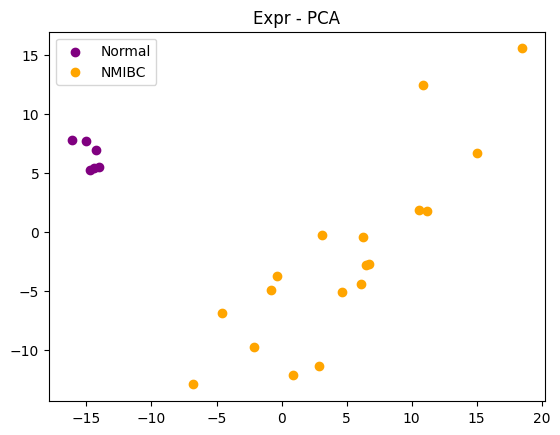

In [31]:
visualize_expr(expr.values, y, "PCA")

D:\anaconda3\envs\adin\lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


0
1


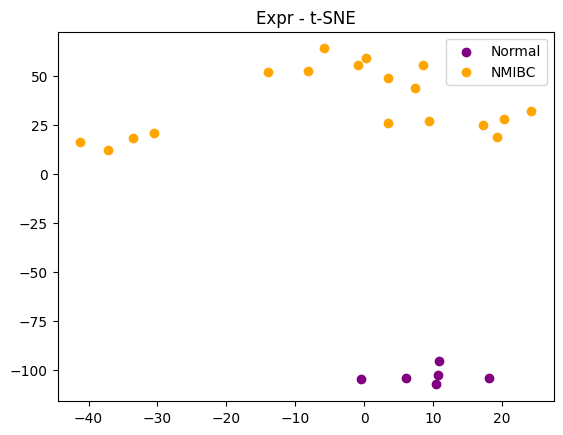

In [32]:
visualize_expr(expr.values, y, "t-SNE")

In [33]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score, f1_score, recall_score, precision_score

def plot_cm(classes, cm):

    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import itertools

    sns.set(style='white')
    fig, ax = plt.subplots()
    plt.imshow(cm, cmap = "Blues")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=20, length=0)

    ax.set_title('Confusion Matrix', size=24, pad=20)
    ax.set_xlabel('Predicted', size=20)
    ax.set_ylabel('Target', size=20)

    nclasses = len(classes)
    ticks = np.arange(0, nclasses, 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", size = 20,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

def validate_model(y_trues, y_preds):

    acc = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    specificity = recall_score(y_trues, y_preds, pos_label=0)
    sensitivity = recall_score(y_trues, y_preds)
    precision =  precision_score(y_trues, y_preds)
    aucs = roc_auc_score(y_trues, y_preds)
    auc = np.mean(aucs)


    cr = classification_report(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    metrics = {
        "accuracy": acc,
        "f1": f1,
        "cm": cm,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "auc_score": auc,
        "precision": precision,
        "report": cr,
        "predictions": y_preds,
    }

    classes = {"Control": 0, "Cancer": 1}
    plot_cm(classes, cm)

    return metrics, "Accuracy: {} \n F1 score: {} \n Sensitivity: {} \n Specificity: {} \n ROC AUC score: {} \n Confusion Matrix: \n {} \n Classification Report: \n {} \n".format(acc, f1, sensitivity, specificity, auc, cm, cr)

In [34]:
def roc_curve(model, data, y_test):

    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots(figsize=(6, 6))

    #gaan_exp.eval()
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')  # Diagonal line

    preds, probs = model.predict(data, return_pred=True, return_prob = True)
    y_test = data.y.cpu().detach().numpy()
    probs = probs.cpu().detach().numpy()

    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve with precise data points
    plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC curve (area = {roc_auc:.5f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)

    metrics, toprint = validate_model(y_test, preds)
    print(toprint)


In [35]:
x = expr.values
x.shape

(24, 27551)

In [342]:
import torch
from torch import nn
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, n_genes, n_classes = 2, hidden_dims = [512, 128]):

        super().__init__()
        torch.manual_seed(1234)

        if hidden_dims[-1] != n_classes:
          hidden_dims.append(n_classes)

        n_layers = len(hidden_dims)

        convs = []
        input_dim = n_genes

        for i in range(n_layers):
          h_dim = hidden_dims[i]
          conv = GCNConv(input_dim, h_dim)
          convs.append(conv)
          input_dim = h_dim

        self.convs = nn.Sequential(*convs)

        #2 classes: Normal, Bladder Cancer

    def forward(self, x, edge_index, edge_weight = None):

        h = x.clone()
        for i, conv in enumerate(self.convs):
            h = conv(h, edge_index, edge_weight)
            if i < len(self.convs) - 1:
                h = h.relu()
        out = h
        return out, h

    def __call__(self, *args, **kwargs):

        x = args[0]
        edge_index = args[1]
        out, _ = self.forward(x, edge_index)
        out = out.view(-1, 1)  # Ensure the target is in the right shape [N, 1]
        return out

n_genes = x.shape[1]
model = GCN(n_genes).to(device)
print(model)

GCN(
  (convs): Sequential(
    (0): GCNConv(27551, 512)
    (1): GCNConv(512, 128)
    (2): GCNConv(128, 2)
  )
)


In [344]:
x = torch.tensor(x).float().to(device)
y = torch.tensor(clinic.values).to(device).flatten()
edge_index = edge_index.to(device)
edge_weights = edge_weights.to(device)
x.shape, y.shape, edge_index.shape

C:\Users\Utente\AppData\Local\Temp\ipykernel_51532\1969180341.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).float().to(device)


(torch.Size([24, 27551]), torch.Size([24]), torch.Size([2, 253]))

In [345]:
from torch_geometric.data import Data

data = Data(x=x, edge_index = edge_index, y = y)
data

Data(x=[24, 27551], edge_index=[2, 253], y=[24])

In [346]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None, accuracy=None):

    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

GCN(
  (convs): Sequential(
    (0): GCNConv(27551, 128)
    (1): GCNConv(128, 2)
  )
)
Embedding shape: [24, 2]


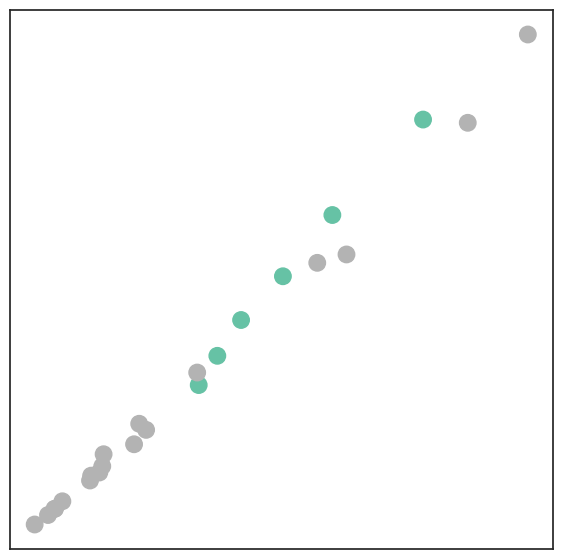

In [348]:
hidden_dims = [128]
model = GCN(n_genes, hidden_dims = hidden_dims).to(device)
print(model)
out, h = model.forward(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y.cpu())

In [351]:
import torch
from sklearn.model_selection import train_test_split

# Assuming `data.y` contains the labels
num_nodes = data.num_nodes
train_size = 0.6  # 60% for training



# Create a boolean mask for training nodes
indices = torch.arange(num_nodes)
train_indices, test_indices = train_test_split(indices, train_size=train_size, stratify=data.y.cpu())


train_mask = torch.zeros(num_nodes, dtype=torch.bool).to(device)
test_mask = torch.zeros(num_nodes, dtype=torch.bool).to(device)
train_mask[train_indices] = True
test_mask[test_indices] = True

data.train_mask = train_mask
data.test_mask = test_mask

In [352]:
data.train_mask, data.test_mask

(tensor([ True,  True,  True,  True, False, False, False,  True, False,  True,
         False,  True,  True, False,  True, False,  True,  True,  True,  True,
         False,  True, False, False], device='cuda:0'),
 tensor([False, False, False, False,  True,  True,  True, False,  True, False,
          True, False, False,  True, False,  True, False, False, False, False,
          True, False,  True,  True], device='cuda:0'))

In [353]:
import torch

def compute_accuracy(predictions, labels):
    """
    Compute accuracy given model predictions and true labels.

    Parameters:
    - predictions (torch.Tensor): Model's predicted outputs.
    - labels (torch.Tensor): Ground truth labels.

    Returns:
    - float: Accuracy as a percentage (0-100).
    """
    # Convert raw predictions to class predictions
    predicted_classes = predictions.argmax(dim=-1)  # Assumes predictions are logits/scores per class

    # Compare with the true labels
    correct = (predicted_classes == labels).sum().item()

    # Compute accuracy
    accuracy = correct / len(labels)  # Accuracy as a percentage
    return accuracy


<IPython.core.display.Javascript object>

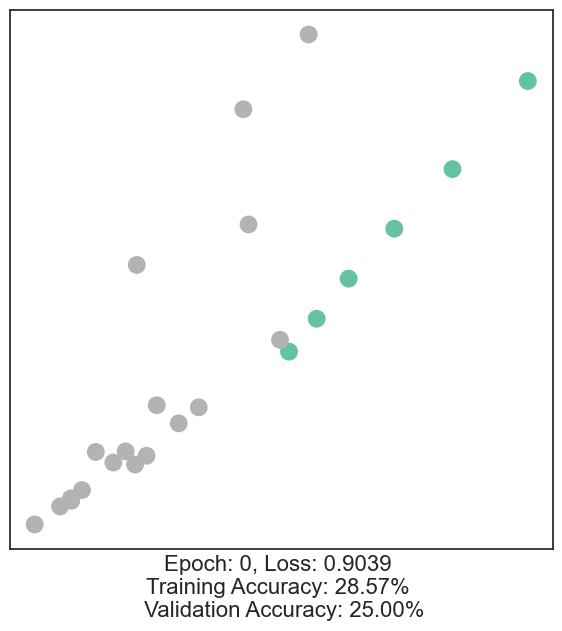

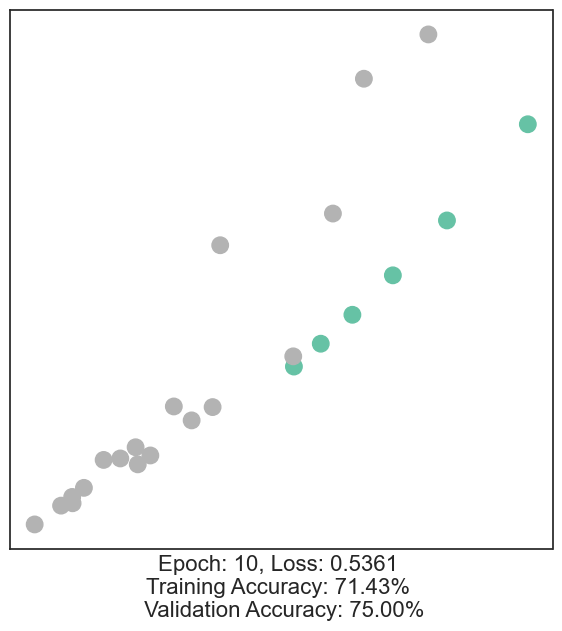

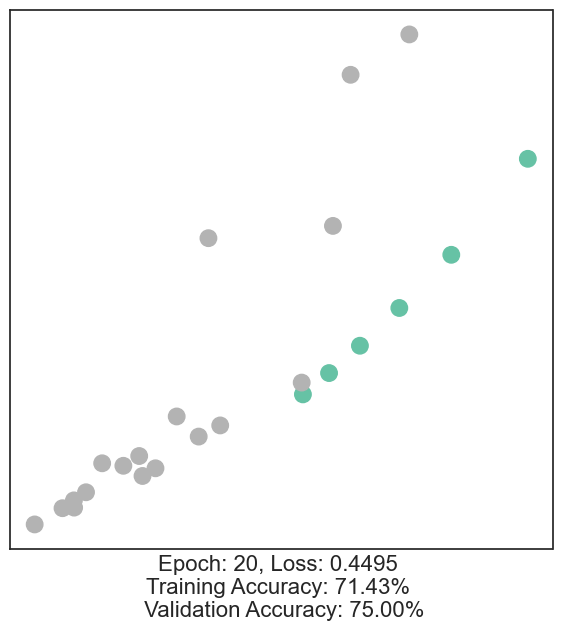

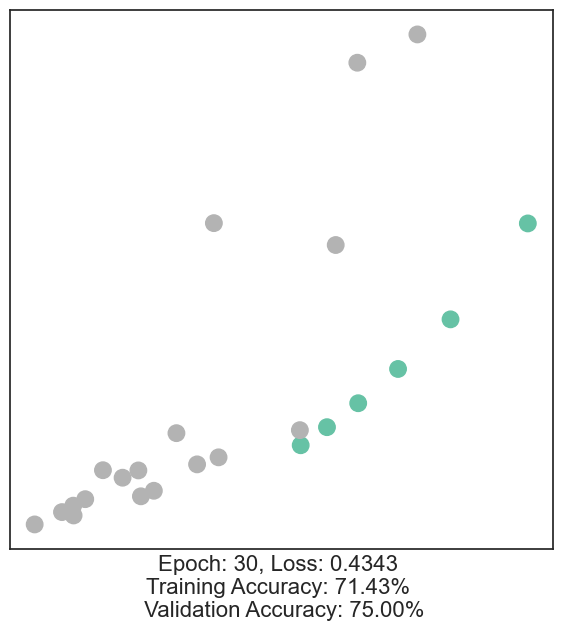

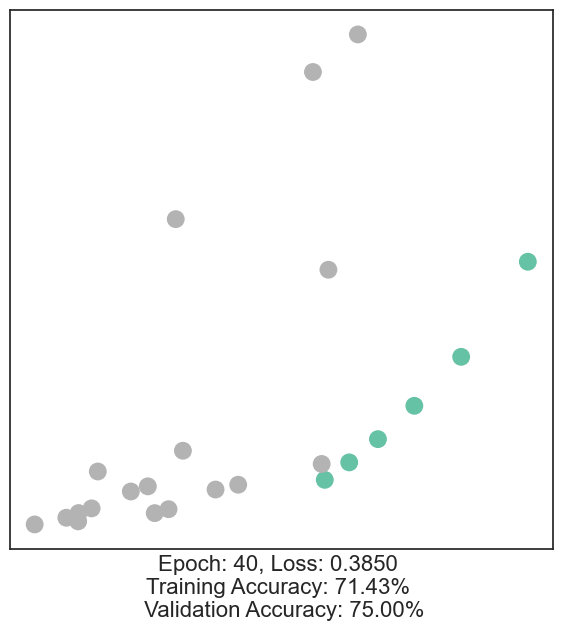

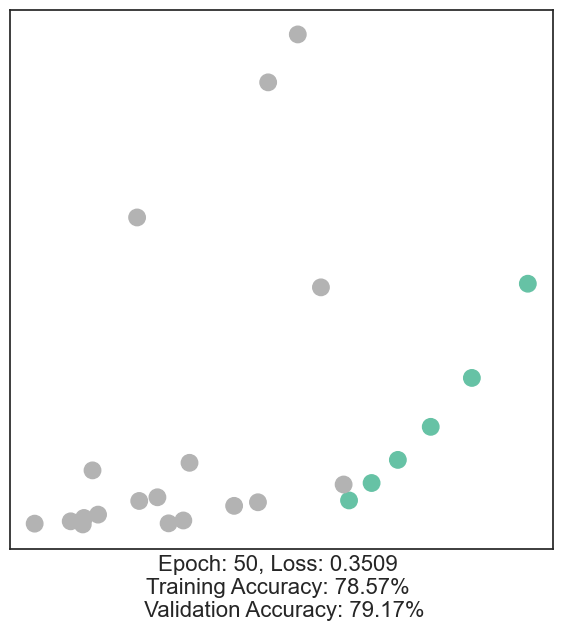

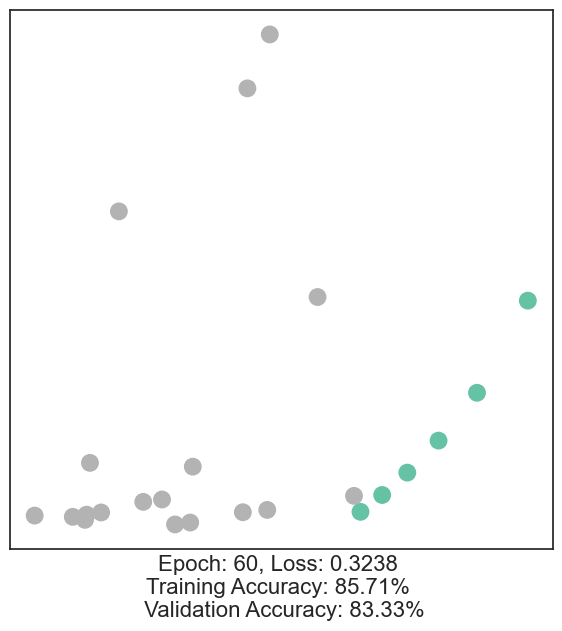

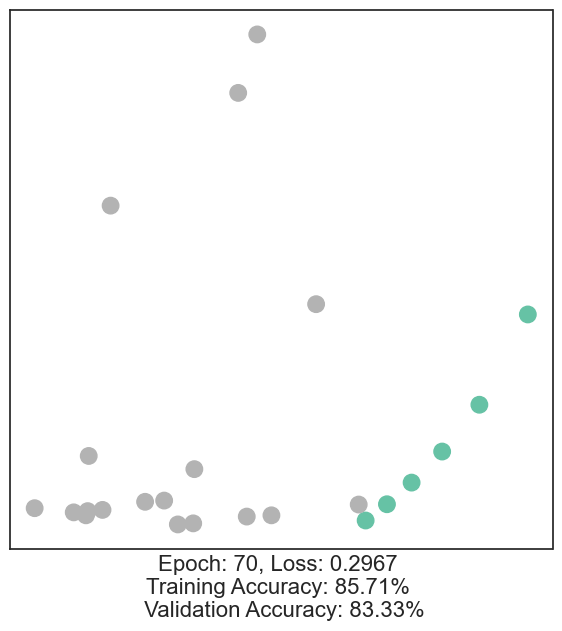

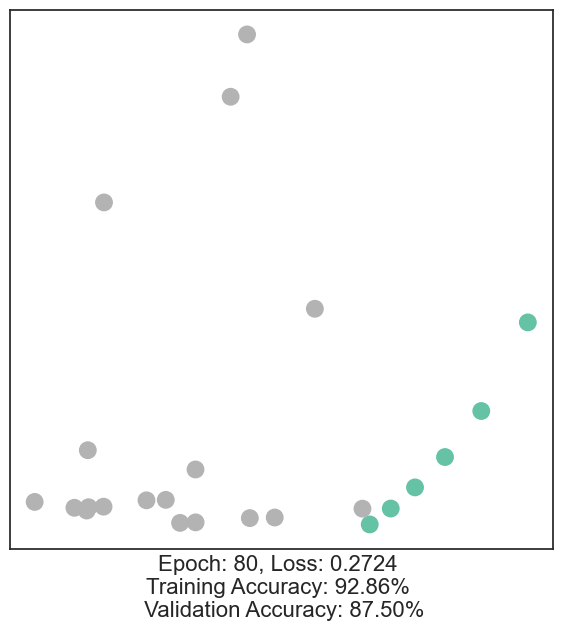

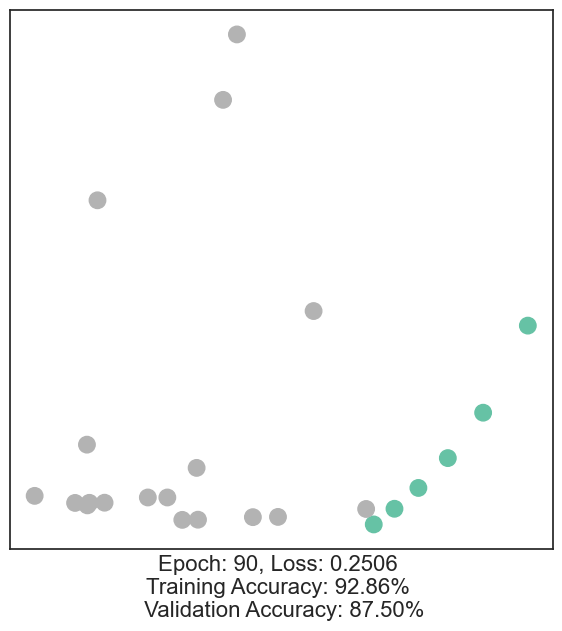

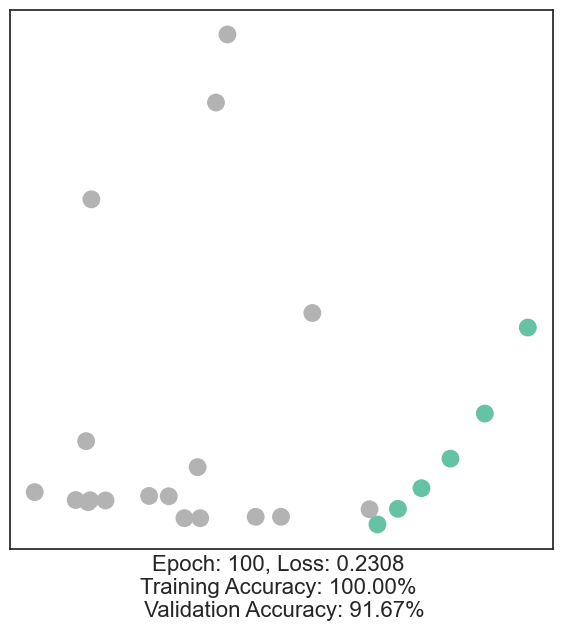

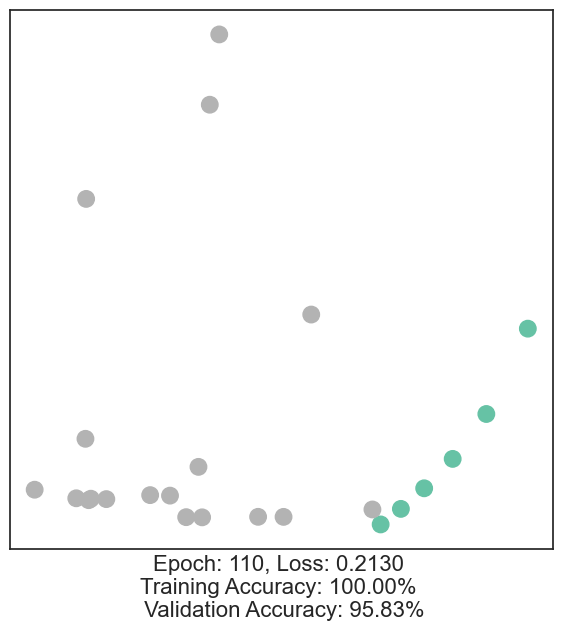

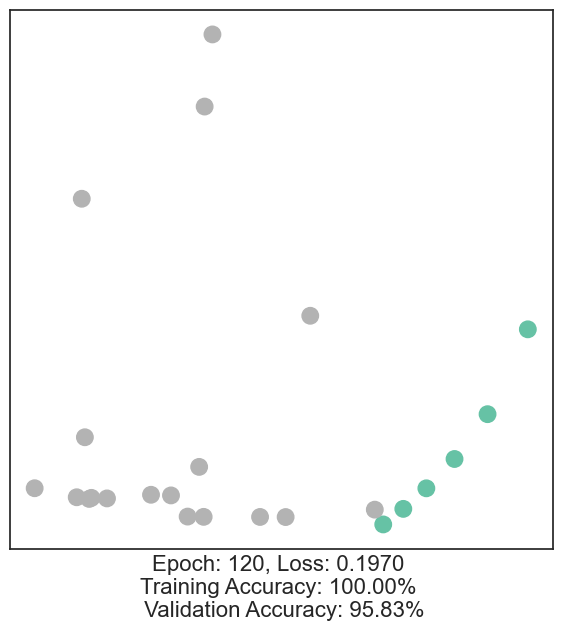

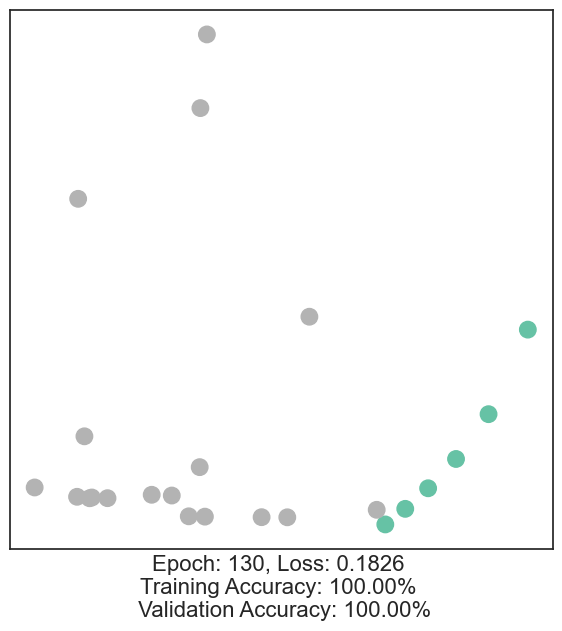

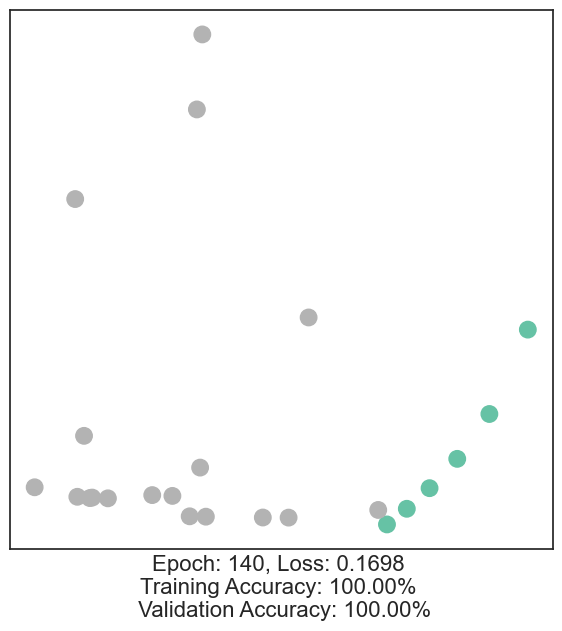

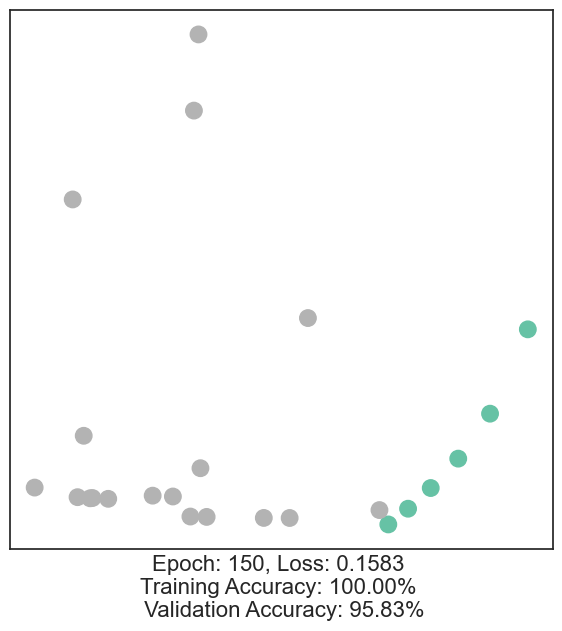

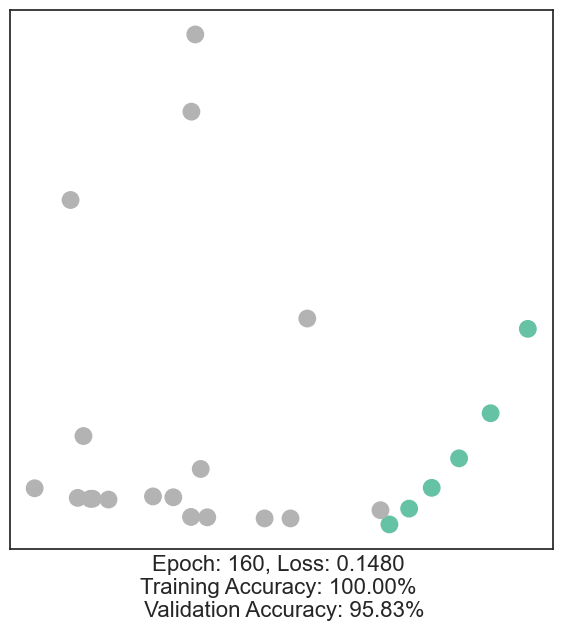

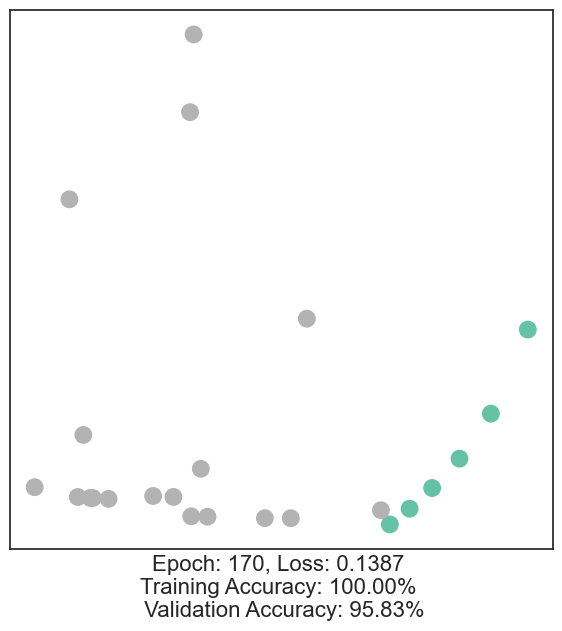

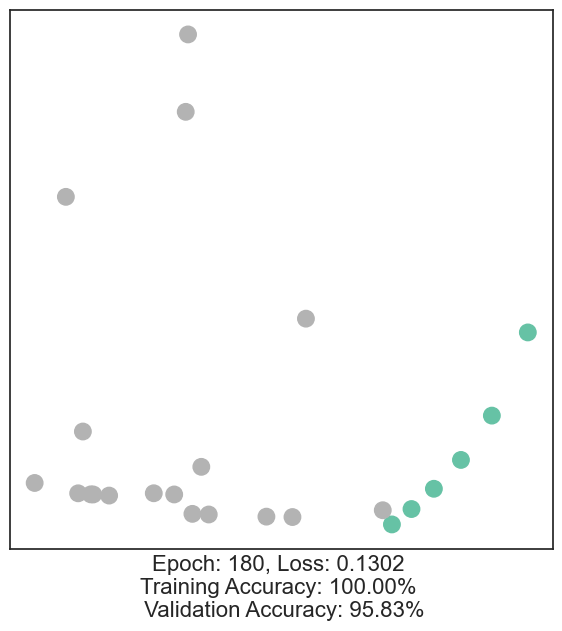

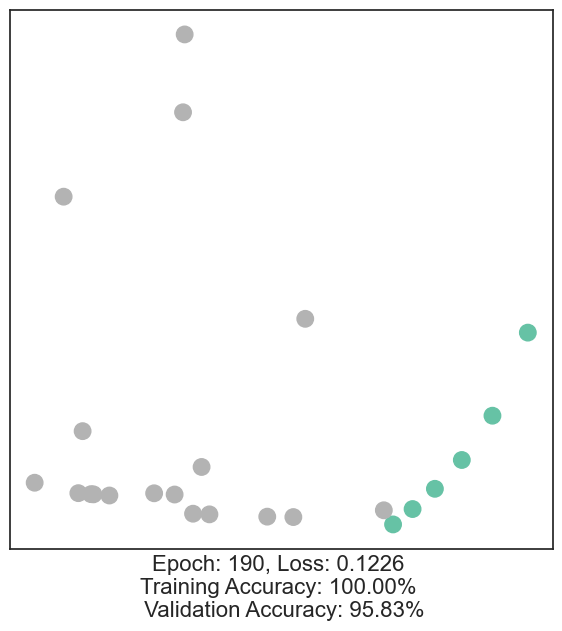

In [354]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

lr = 0.0001
hidden_dims = [32]

model = GCN(n_genes, hidden_dims=hidden_dims).to(device)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)  # Define optimizer.

def train(data):

    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out, h = model.forward(data.x, data.edge_index)  # Perform a single forward pass.

    predictions = out[data.train_mask]  # Shape: [14, 2]
    target_classes = data.y[data.train_mask].long()  # Shape: [14], integer class labels
    loss = criterion(predictions, target_classes)

    loss.backward()  # Compute gradients
    optimizer.step()  # Update model parameters

    # Training accuracy
    train_acc = compute_accuracy(predictions, target_classes)

    # Validation accuracy
    predictions = out  # For the entire graph
    target_classes = data.y
    val_acc = compute_accuracy(predictions, target_classes)

    accuracy = {'train': train_acc, 'val': val_acc}
    return loss, h, accuracy

for epoch in range(200):
    loss, h, accuracy = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y.cpu(), epoch=epoch, loss=loss, accuracy=accuracy)
        time.sleep(0.3)

In [356]:
def test(data):

    model.eval()

    optimizer.zero_grad()  # Clear gradients.
    out, h = model.forward(data.x, data.edge_index)  # Perform a single forward pass.
    predicted_classes = torch.argmax(out[data.test_mask], axis=1).float() # [0.6, 0.2, 0.7, 0.1] -> 2
    predicted_classes.requires_grad = True
    target_classes = data.y[data.train_mask].float()

    return predicted_classes

In [357]:
y_pred = test(data)
y_pred

tensor([0., 0., 0., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0',
       requires_grad=True)

In [358]:
y_test = data.y[data.test_mask]
y_test

tensor([0, 0, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')

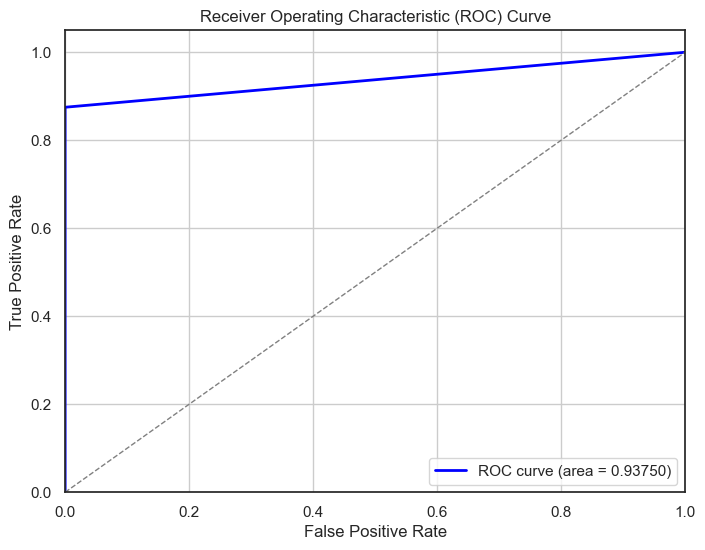

In [359]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve with precise data points
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

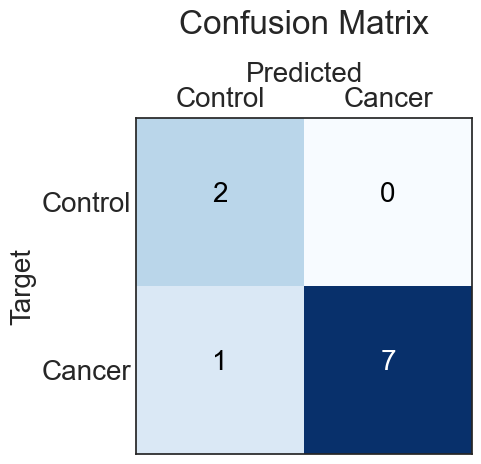

In [360]:
metrics, _ = validate_model(data.y[data.test_mask].cpu().detach().numpy(), y_pred.cpu().detach().numpy())

In [361]:
metrics_to_df = ['accuracy', 'f1',  'sensitivity', 'specificity', 'auc_score', 'precision']
columns = [metric for metric in metrics if metric in metrics_to_df]
df = pd.DataFrame(columns=columns)
for col in columns:
  df[col] = [metrics[col]]
df

,accuracy,f1,sensitivity,specificity,auc_score,precision
0,0.9,0.933333,0.875,1.0,0.9375,1.0


In [362]:
from torch_geometric.explain import Explainer, GNNExplainer

explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=1000, lr = 0.001),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='binary_classification',
        task_level='node',
        return_type='raw',
    ),
)

Feature importance plot has been saved to 'feature_importance.png'


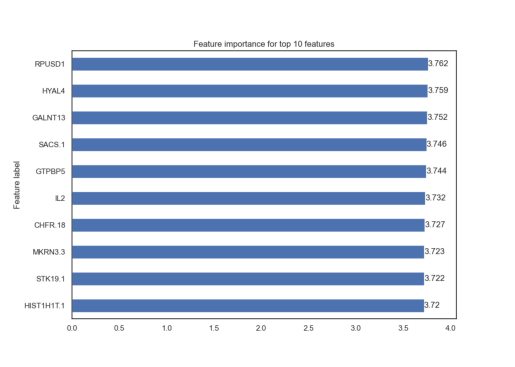

In [366]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = 'feature_importance.png'
explanation.visualize_feature_importance(path, top_k=10, feat_labels = expr.columns)
print(f"Feature importance plot has been saved to '{path}'")

img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

Subgraph visualization plot has been saved to 'subgraph.png'


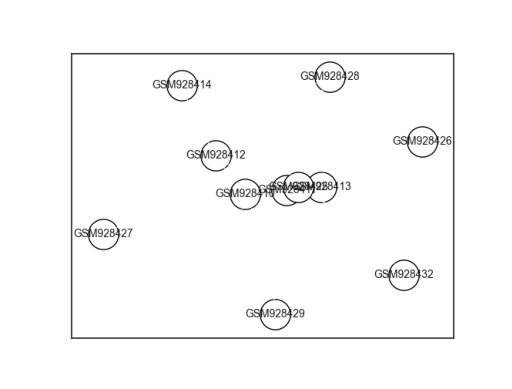

In [367]:
path = 'subgraph.png'
explanation.get_explanation_subgraph()
explanation.visualize_graph(path, node_labels=expr.index)
print(f"Subgraph visualization plot has been saved to '{path}'")

img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [368]:
#!pip install captum

In [369]:
from captum.attr import Saliency, IntegratedGradients

def model_forward(edge_mask, data):
    out, h = model.forward(data.x, data.edge_index, edge_mask)
    return out


def explain(method, data, target=0):
    input_mask = torch.ones(data.edge_index.shape[1]).requires_grad_(True).to(device)
    if method == 'ig':
        ig = IntegratedGradients(model_forward)
        mask = ig.attribute(input_mask, target=target,
                            additional_forward_args=(data,),
                            internal_batch_size=data.edge_index.shape[1])
    elif method == 'saliency':
        saliency = Saliency(model_forward)
        mask = saliency.attribute(input_mask, target=target,
                                  additional_forward_args=(data,))
    else:
        raise Exception('Unknown explanation method')

    edge_mask = np.abs(mask.cpu().detach().numpy())
    if edge_mask.max() > 0:  # avoid division by zero
        edge_mask = edge_mask / edge_mask.max()
    return edge_mask

D:\anaconda3\envs\adin\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [370]:
import random
from collections import defaultdict

def aggregate_edge_directions(edge_mask, data):
    edge_mask_dict = defaultdict(float)
    for val, u, v in list(zip(edge_mask, *data.edge_index)):
        u, v = u.item(), v.item()
        if u > v:
            u, v = v, u
        edge_mask_dict[(u, v)] += val
    return edge_mask_dict


def draw_network(g, y, edge_mask=None):
    import matplotlib

    g = g.copy().to_undirected()

    pos = nx.spring_layout(g)
    if edge_mask is None:
        edge_color = 'black'
        widths = None
    else:
        edge_color = [edge_mask[(u, v)] for u, v in g.edges()]
        widths = [x * 10 for x in edge_color]

    min_val, max_val = 0.3, 1.0
    n = 10
    orig_cmap = plt.cm.Reds
    colors = orig_cmap(np.linspace(min_val, max_val, n))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("cmap", colors)

    nx.draw(g, pos=pos, width=widths, font_size = 14,
            edge_color=edge_color, node_color = y, cmap = cmap, edge_cmap=plt.cm.Blues, with_labels=True)

    plt.show()

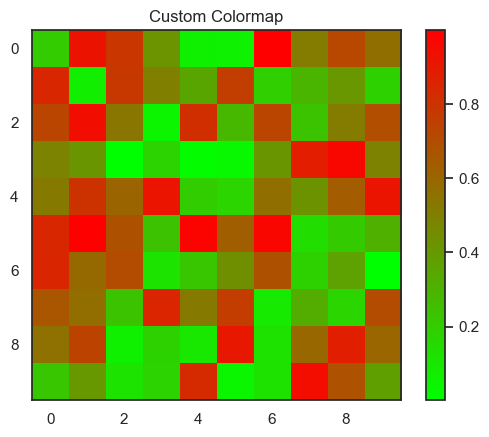

In [371]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

# Define the colormap
colors = [(0, 1, 0), (1, 0, 0)]  # Green to Red
cmap = LinearSegmentedColormap.from_list("GreenRed", colors)

# Sample data
d = np.random.rand(10, 10)

# Display with custom colormap
plt.imshow(d, cmap=cmap)
plt.colorbar()
plt.title("Custom Colormap")
plt.show()

In [372]:
# Define the white-to-black colormap
colors = [(1, 1, 1), (0, 0, 0)]  # White to Black
white_black_cmap = LinearSegmentedColormap.from_list("WhiteBlack", colors)

In [373]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import cm
import matplotlib as mpl

for title, method in [('Integrated Gradients', 'ig'), ('Saliency', 'saliency')]:

    # Calcolo delle maschere e aggregazione
    edge_mask = explain(method, data, target=1)

    edge_mask_dict = aggregate_edge_directions(edge_mask, data)

    # Normalizzazione dei pesi per la visualizzazione
    max_weight = max(edge_mask_dict.values())
    normalized_weights = {edge: weight / max_weight for edge, weight in edge_mask_dict.items()}

    # Disegno del grafo
    fig, ax= plt.subplots(figsize=(10, 8))  # Ridimensiona la figura per test
    plt.title(title)

    # Usa un layout che garantisca una buona separazione tra i nodi
    pos = nx.spring_layout(G)  # Modifica di k per regolare la distanza
    # Crea un mapping da stringhe a interi
    node_mapping = {node: i for i, node in enumerate(G.nodes())}
    node_mapping_rev = {i: node for i, node in node_mapping.items()}
    
    # Rinomina i nodi nel grafo
    G = nx.relabel_nodes(G, node_mapping)
    
    # Aggiorna il dizionario pos con gli interi
    pos = {node_mapping[node]: coord for node, coord in pos.items()}
    
    # Disegna gli archi con spessore proporzionale ai pesi
    edges, weights = zip(*normalized_weights.items())
    nx.draw_networkx_edges(G, pos,
                           edgelist=edges,
                           width=[20 * w for w in weights],
                           edge_color=weights,
                           edge_cmap=white_black_cmap)

    # Disegna i nodi con dimensioni proporzionali al loro grado
    node_sizes = [200 + 100 * G.degree(n) / max(dict(G.degree()).values()) for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos,
                           node_size=node_sizes,
                           node_color=data.y.cpu().detach().numpy(),
                           cmap=cmap)
    # Configure and display legend for unique states

    y = data.y.cpu().detach().numpy()
    uq_y = np.unique(y)
    value_index = {v: i for i, v in enumerate(uq_y)}
    patches = [mpl.patches.Patch(color=color, label=label) for label, color in {"healthy": "green", "anomalous": "red"}.items()]
    plt.legend(handles=patches)

        
    # Aggiungi etichette ai nodi
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
    
    # Aggiungi una barra dei colori per i pesi degli archi
    plt.colorbar(plt.cm.ScalarMappable(cmap=white_black_cmap), label="Normalized Edge Weights", shrink=0.8, ax=ax)

    plt.tight_layout()  # Ottimizza lo spazio nella figura
    fig.savefig("{}.png".format(title.replace(" ", "_")), dpi = 600)

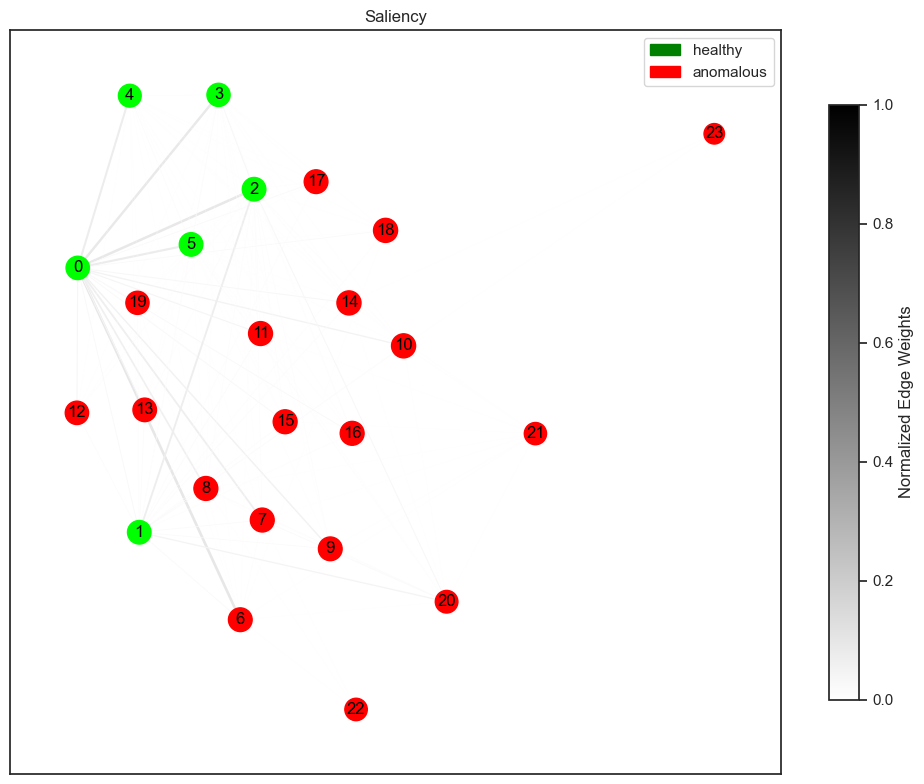

In [374]:
fig